<a href="https://colab.research.google.com/github/DongGwan0505/NoiseAware-License-Plate-Recognition/blob/main/YOLOv3_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#처음 한번만 실행해도 된다.
!apt-get update
!apt-get upgrade

!apt-get install -y build-essential
!apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y libavcodec-dev libavformat-dev libswscale-d
!apt-get install -y libopencv-dev

!apt-get install -y g++-5
!apt-get install -y gcc-5

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/object_detection

[Errno 2] No such file or directory: '/content/drive/My Drive/object_detection'
/content


In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git #학습데이터가 없음

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
%cd darknet

[Errno 2] No such file or directory: 'darknet'
/content


In [ ]:
#다크넷 컴파일 with GPU
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

drive  sample_data
sed: can't read Makefile: No such file or directory
sed: can't read Makefile: No such file or directory
make: *** No targets specified and no makefile found.  Stop.


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74 -O /content/drive/MyDrive/object_detection/darknet53.conv.74

--2024-11-19 10:04:44--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/object_detection/darknet53.conv.74’

/content/drive/MyDr 100%[===================>] 154.96M  24.3MB/s    in 7.1s    

2024-11-19 10:04:51 (22.0 MB/s) - ‘/content/drive/MyDrive/object_detection/darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
%cd /content/drive/MyDrive/object_detection/darknet
!chmod +x darknet

/content/drive/MyDrive/object_detection/darknet


In [ ]:
!apt update
!apt install -y libcudnn8

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,315 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,659 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,610 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubu

In [ ]:
%cd /content/drive/MyDrive/object_detection/darknet

# 혹시 이전에 빌드된 .o 파일이 남아있을 수 있으므로 clean
!make clean

# 다시 빌드
!make

/content/drive/MyDrive/object_detection/darknet
rm -rf ./obj/image_opencv.o ./obj/http_stream.o ./obj/gemm.o ./obj/utils.o ./obj/dark_cuda.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/darknet.o ./obj/detection_layer.o ./obj/captcha.o ./obj/route_layer.o ./obj/writing.o ./obj/box.o ./obj/nightmare.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/coco.o ./obj/dice.o ./obj/yolo.o ./obj/detector.o ./obj/layer.o ./obj/compare.o ./obj/classifier.o ./obj/local_layer.o ./obj/swag.o ./obj/shortcut_layer.o ./obj/representation_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/rnn.o ./obj/rnn_vid.o ./obj/crnn_layer.o ./obj/demo.o ./obj/tag.o ./obj/cifar.o ./obj/go.o ./obj/batchnor

In [ ]:
!./darknet detector train \
/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data \
/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg \
/content/drive/MyDrive/object_detection/darknet/darknet53.conv.74 \
-dont_show 2>&1 | tee train_log.txt


/bin/bash: line 1: ./darknet: No such file or directory


In [ ]:
#만약 중간에 런타임이 끊긴다면 .weight 파일에 n번의 배치마다 저장되므로 이것을 사용한다.
!./darknet detector train \
/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data \
/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg \
/content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights -dont_show \
2>&1 | tee train_log.txt


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 1557530, rewritten_bbox = 0.025425 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 72 Avg (IOU: 0.902320), count: 2, class_loss = 0.000541, iou_loss = 0.024312, total_loss = 0.024854 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 83 Avg (IOU: 0.883639), count: 14, class_loss = 0.000009, iou_loss = 0.262280, total_loss = 0.262289 
 total_bbox = 1557546, rewritten_bbox = 0.025425 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 72 Avg (IOU: 0.904035), count: 2, class_loss = 0.000001, iou_loss = 0.018476, total_loss = 0.018477 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 83 Avg (IOU: 0.905608), count: 14, class_loss = 0.000297, iou_loss = 0.222374, total_loss = 0.222672 
 total_bbox = 1557562, rewritten_bbox = 0.025424 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 72 Avg (IOU: 0.873919), count: 2, class_loss = 0.000026, iou_loss =

In [ ]:
import os

image_folder = "/content/drive/MyDrive/object_detection/darknet/data/test_pic/"
output_folder = "/content/drive/MyDrive/object_detection/darknet/data/predictions/"
labels_folder = os.path.join(output_folder, "labels")  # 라벨 txt 저장 경로

# 결과 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 라벨 폴더가 없으면 생성
if not os.path.exists(labels_folder):
    os.makedirs(labels_folder)

# 폴더 내 모든 이미지 파일 (*.jpg, *.png, *.jpeg)을 리스트로
image_files = [
    f for f in os.listdir(image_folder)
    if f.endswith(('.jpg', '.png', '.jpeg'))
]

for img in image_files:
    # 1) 입력 / 출력 경로 설정
    img_path = os.path.join(image_folder, img)      # 원본 이미지 경로
    output_img = os.path.join(output_folder, img)   # 결과 이미지 경로

    # Darknet detector test 명령어 (라벨 저장은 -save_labels 옵션)
    cmd = f"./darknet detector test \
        /content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data \
        /content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg \
        /content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights \
        {img_path} -dont_show -thresh 0.1 -save_labels"

    print(f"Processing {img} ...")
    os.system(cmd)  # YOLO 추론 실행

    # 2) 결과 이미지(predictions.jpg)를 개별 이미지 이름으로 변경
    if os.path.exists("predictions.jpg"):
        os.rename("predictions.jpg", output_img)

    # 3) Darknet이 생성한 라벨 txt를 labels 폴더로 이동
    #    Darknet은 원본 이미지 경로와 같은 폴더에 "<이미지이름>.txt"를 생성함
    #    => 이를 우리가 원하는 "labels" 폴더로 옮기기
    label_src = os.path.splitext(img_path)[0] + ".txt"  # 예: "test_pic/Whitelong6k_0.txt"
    label_dst = os.path.join(labels_folder, os.path.splitext(img)[0] + ".txt")
    # 예: "predictions/labels/Whitelong6k_0.txt"

    if os.path.exists(label_src):
        os.rename(label_src, label_dst)
    else:
        print(f"⚠️ 라벨 파일이 존재하지 않습니다: {label_src}")

print("✅ 모든 이미지 + YOLO 라벨 저장이 완료되었습니다!")


Processing Whitelong6k_0.jpg ...
Processing Whitelong6k_1.jpg ...
Processing Whitelong6k_10.jpg ...
Processing Whitelong6k_100.jpg ...
Processing Whitelong6k_101.jpg ...
Processing Whitelong6k_102.jpg ...
Processing Whitelong6k_103.jpg ...
Processing Whitelong6k_104.jpg ...
Processing Whitelong6k_105.jpg ...
Processing Whitelong6k_106.jpg ...
Processing Whitelong6k_107.jpg ...
Processing Whitelong6k_108.jpg ...
Processing Whitelong6k_109.jpg ...
Processing Whitelong6k_11.jpg ...
Processing Whitelong6k_110.jpg ...
Processing Whitelong6k_111.jpg ...
Processing Whitelong6k_112.jpg ...
Processing Whitelong6k_113.jpg ...
Processing Whitelong6k_114.jpg ...
Processing Whitelong6k_115.jpg ...
Processing Whitelong6k_116.jpg ...
Processing Whitelong6k_117.jpg ...
Processing Whitelong6k_118.jpg ...
Processing Whitelong6k_119.jpg ...
Processing Whitelong6k_12.jpg ...
Processing Whitelong6k_120.jpg ...
Processing Whitelong6k_121.jpg ...
Processing Whitelong6k_122.jpg ...
Processing Whitelong6k_123.

In [ ]:
import os
import re
import subprocess
import numpy as np

# -------------------------------
# 0) 사용자 클래스 목록
# -------------------------------
user_defined_classes = [
    "NONE", "WL", "NONE", "NONE", "NONE", "NONE", "NONE", "NONE", "NONE", "NONE",
    "0","1","2","3","4","5","6","7","8","9",
    "NONE","BA","SA","A","JA","HA","HEO","HO","BAE","NONE","NONE",
    "GA","NA","DA","LA","MA","GEO","NEO","DEO","LEO","MEO","BEO","SEO","EO","JEO","GO","NO","DO","LO","MO","BO","SO","O","JO","GU","NU","DU","LU","MU","BU","SU","U","JU"
]

# 1) 클래스 매핑 딕셔너리 생성
class_mapping = {}
for idx, name in enumerate(user_defined_classes):
    if name == "NONE":
        continue
    if name not in class_mapping:
        class_mapping[name] = idx

print("== Class Mapping ==")
print(class_mapping)

# -------------------------------
# 1) Darknet 출력 파싱
# -------------------------------
def parse_darknet_output(output_str):
    detections = []
    lines = output_str.strip().split('\n')
    for line in lines:
        match = re.match(
            r"(.+): (\d+)%.*\(left_x:\s*(\d+)\s*top_y:\s*(\d+)\s*width:\s*(\d+)\s*height:\s*(\d+)\)",
            line
        )
        if match:
            cls_name = match.group(1).strip()
            conf = float(match.group(2)) / 100.0
            left_x = float(match.group(3))
            top_y = float(match.group(4))
            w = float(match.group(5))
            h = float(match.group(6))

            x1 = left_x
            y1 = top_y
            x2 = x1 + w
            y2 = y1 + h

            # cls_name -> class_id
            if cls_name in class_mapping:
                class_id = class_mapping[cls_name]
            else:
                class_id = -1

            detections.append([x1, y1, x2, y2, conf, class_id])
    return detections

# -------------------------------
# 2) IoU 계산
# -------------------------------
def bbox_iou_np(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_w = max(0, x2 - x1)
    inter_h = max(0, y2 - y1)
    inter_area = inter_w * inter_h

    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - inter_area
    return inter_area / union if union > 0 else 0.0

# -------------------------------
# 3) 후처리
# -------------------------------
def further_filter_detections_np(detections, iou_thresh=0.9):
    if not detections:
        return []

    # 1) conf desc
    detections.sort(key=lambda x: x[4], reverse=True)

    # 2) IoU 필터
    iou_filtered = []
    for det in detections:
        keep = True
        for kept in iou_filtered:
            if bbox_iou_np(det, kept) > iou_thresh:
                keep = False
                break
        if keep:
            iou_filtered.append(det)

    # 3) 클래스별 개수 제한
    class_1      = [d for d in iou_filtered if d[5] == 1]
    class_10_19  = [d for d in iou_filtered if 10 <= d[5] <= 19]
    class_20_63  = [d for d in iou_filtered if 20 <= d[5] <= 63]

    class_1.sort(key=lambda x: x[4], reverse=True)
    class_10_19.sort(key=lambda x: x[4], reverse=True)
    class_20_63.sort(key=lambda x: x[4], reverse=True)

    class_1     = class_1[:1]      # 최대 1
    class_10_19 = class_10_19[:6]  # 최대 6
    class_20_63 = class_20_63[:1]  # 최대 1

    filtered = class_1 + class_10_19 + class_20_63
    filtered.sort(key=lambda x: x[4], reverse=True)

    return filtered


# -------------------------------
# 4) 여러 이미지 추론 -> 결과 이미지 + 라벨 txt
# -------------------------------
image_folder   = "/content/drive/MyDrive/object_detection/darknet/data/Noise_10x10/"
output_folder  = "/content/drive/MyDrive/object_detection/darknet/data/predictions/"
labels_folder  = os.path.join(output_folder, "labels")

os.makedirs(output_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Darknet config
data_file    = "/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data"
cfg_file     = "/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg"
weights_file = "/content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights"

image_files = [f for f in os.listdir(image_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)

    # Darknet 추론 명령
    cmd = [
        "./darknet", "detector", "test",
        data_file,
        cfg_file,
        weights_file,
        img_path,
        "-dont_show", "-ext_output", "-thresh", "0.1"
    ]
    print(f"\n[PROCESSING] {img_name} ...")
    result = subprocess.run(cmd, capture_output=True, text=True)

    # 1) 파싱 + 후처리
    raw_dets = parse_darknet_output(result.stdout)
    filtered_dets = further_filter_detections_np(raw_dets, iou_thresh=0.9)
    print(f"  >> raw={len(raw_dets)} bboxes, after_filter={len(filtered_dets)} bboxes")

    # 2) 결과 이미지: predictions.jpg -> output_folder/img_name
    pred_img_path = os.path.join(output_folder, img_name)
    if os.path.exists("predictions.jpg"):
        os.rename("predictions.jpg", pred_img_path)
    else:
        print("⚠ No predictions.jpg found. Possibly no detection or error occurred.")

    # 3) 후처리된 라벨(txt) 저장
    #   여기서는 x1,y1,x2,y2,conf,cls_id를 그대로 저장. 원하면 YOLO형식으로 변환 가능.
    label_file_path = os.path.join(labels_folder, os.path.splitext(img_name)[0] + ".txt")
    with open(label_file_path, "w") as f:
        for det in filtered_dets:
            x1, y1, x2, y2, conf, cid = det
            line = f"{x1:.1f} {y1:.1f} {x2:.1f} {y2:.1f} {conf:.2f} {int(cid)}\n"
            f.write(line)

    print(f"  => Saved result image to: {pred_img_path}")
    print(f"  => Saved label txt to:   {label_file_path}")

print("\n✅ 모든 이미지 처리 완료! 결과 이미지는 'predictions/' 폴더, 라벨은 'predictions/labels/' 폴더에 있습니다.")



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  >> raw=8 bboxes, after_filter=8 bboxes
  => Saved result image to: /content/drive/MyDrive/object_detection/darknet/data/predictions/noisy_Whitelong6k_172.jpg
  => Saved label txt to:   /content/drive/MyDrive/object_detection/darknet/data/predictions/labels/noisy_Whitelong6k_172.txt

[PROCESSING] noisy_Whitelong6k_17.jpg ...
  >> raw=8 bboxes, after_filter=8 bboxes
  => Saved result image to: /content/drive/MyDrive/object_detection/darknet/data/predictions/noisy_Whitelong6k_17.jpg
  => Saved label txt to:   /content/drive/MyDrive/object_detection/darknet/data/predictions/labels/noisy_Whitelong6k_17.txt

[PROCESSING] noisy_Whitelong6k_173.jpg ...
  >> raw=10 bboxes, after_filter=8 bboxes
  => Saved result image to: /content/drive/MyDrive/object_detection/darknet/data/predictions/noisy_Whitelong6k_173.jpg
  => Saved label txt to:   /content/drive/MyDrive/object_detection/darknet/data/predictions/labels/noisy_Whitelong6k_173.txt

[PROCESSING] noisy_Whi

In [ ]:
import os
import re
import subprocess
import numpy as np
from PIL import Image  # 이미지 크기를 얻기 위해 Pillow 사용

# -------------------------------
# 0) 사용자 클래스 목록
# -------------------------------
user_defined_classes = [
    "NONE", "WL", "NONE", "NONE", "NONE", "NONE", "NONE", "NONE", "NONE", "NONE",
    "0","1","2","3","4","5","6","7","8","9",
    "NONE","BA","SA","A","JA","HA","HEO","HO","BAE","NONE","NONE",
    "GA","NA","DA","LA","MA","GEO","NEO","DEO","LEO","MEO","BEO","SEO","EO","JEO","GO","NO","DO","LO","MO","BO","SO","O","JO","GU","NU","DU","LU","MU","BU","SU","U","JU"
]

# 1) 클래스 매핑 딕셔너리 생성
class_mapping = {}
for idx, name in enumerate(user_defined_classes):
    if name == "NONE":
        continue
    if name not in class_mapping:
        class_mapping[name] = idx

print("== Class Mapping ==")
print(class_mapping)

# -------------------------------
# 1) Darknet 출력 파싱 함수
# -------------------------------
def parse_darknet_output(output_str):
    """
    -ext_output 콘솔출력 예시를 파싱 → [x1, y1, x2, y2, conf, class_id] 리스트
    (픽셀 좌표)
    """
    detections = []
    lines = output_str.strip().split('\n')
    for line in lines:
        # 예: "WL: 100%  (left_x: 123  top_y: 45  width: 67  height: 50)"
        match = re.match(
            r"(.+): (\d+)%.*\(left_x:\s*(\d+)\s*top_y:\s*(\d+)\s*width:\s*(\d+)\s*height:\s*(\d+)\)",
            line
        )
        if match:
            cls_name = match.group(1).strip()
            conf = float(match.group(2)) / 100.0
            left_x = float(match.group(3))
            top_y = float(match.group(4))
            w = float(match.group(5))
            h = float(match.group(6))

            x1 = left_x
            y1 = top_y
            x2 = x1 + w
            y2 = y1 + h

            # cls_name -> class_id
            if cls_name in class_mapping:
                class_id = class_mapping[cls_name]
            else:
                class_id = -1

            detections.append([x1, y1, x2, y2, conf, class_id])
    return detections

# -------------------------------
# 2) IoU 계산 (픽셀 좌표)
# -------------------------------
def bbox_iou_np(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_w = max(0, x2 - x1)
    inter_h = max(0, y2 - y1)
    inter_area = inter_w * inter_h

    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - inter_area
    return inter_area / union if union > 0 else 0.0

# -------------------------------
# 3) 후처리
# -------------------------------
def further_filter_detections_np(detections, iou_thresh=0.9):
    """
    1) conf 내림차순 정렬
    2) IoU > iou_thresh 이면 중복 제거
    3) 클래스별 개수 제한:
       - cls_id=1 : 최대 1개
       - cls_id=10..19 : 최대 6개
       - cls_id=20..63 : 최대 1개
    """
    if not detections:
        return []

    # 1) conf desc
    detections.sort(key=lambda x: x[4], reverse=True)

    # 2) IoU 필터
    iou_filtered = []
    for det in detections:
        keep = True
        for kept in iou_filtered:
            if bbox_iou_np(det, kept) > iou_thresh:
                keep = False
                break
        if keep:
            iou_filtered.append(det)

    # 3) 클래스별 개수 제한
    class_1      = [d for d in iou_filtered if d[5] == 1]
    class_10_19  = [d for d in iou_filtered if 10 <= d[5] <= 19]
    class_20_63  = [d for d in iou_filtered if 20 <= d[5] <= 63]

    class_1.sort(key=lambda x: x[4], reverse=True)
    class_10_19.sort(key=lambda x: x[4], reverse=True)
    class_20_63.sort(key=lambda x: x[4], reverse=True)

    class_1     = class_1[:1]      # 최대 1
    class_10_19 = class_10_19[:6]  # 최대 6
    class_20_63 = class_20_63[:1]  # 최대 1

    filtered = class_1 + class_10_19 + class_20_63
    filtered.sort(key=lambda x: x[4], reverse=True)

    return filtered

# -------------------------------
# 4) 여러 이미지 추론 -> 결과 이미지 + "YOLO 형식" 라벨 txt
# -------------------------------
from PIL import Image  # 이미지 크기(폭,높이) 확인 용

image_folder   = "/content/drive/MyDrive/object_detection/darknet/data/test_pic/"
output_folder  = "/content/drive/MyDrive/object_detection/darknet/data/predictions/"
labels_folder  = os.path.join(output_folder, "labels")

os.makedirs(output_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Darknet config
data_file    = "/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data"
cfg_file     = "/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg"
weights_file = "/content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights"

image_files = [f for f in os.listdir(image_folder)
               if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)

    # Darknet 추론 명령
    cmd = [
        "./darknet", "detector", "test",
        data_file,
        cfg_file,
        weights_file,
        img_path,
        "-dont_show", "-ext_output", "-thresh", "0.1"
    ]
    print(f"\n[PROCESSING] {img_name} ...")
    result = subprocess.run(cmd, capture_output=True, text=True)

    # 1) 파싱 + 후처리 (픽셀 좌표)
    raw_dets = parse_darknet_output(result.stdout)
    filtered_dets = further_filter_detections_np(raw_dets, iou_thresh=0.9)
    print(f"  >> raw={len(raw_dets)} bboxes, after_filter={len(filtered_dets)} bboxes")

    # 2) 결과 이미지: predictions.jpg -> output_folder/img_name
    pred_img_path = os.path.join(output_folder, img_name)
    if os.path.exists("predictions.jpg"):
        os.rename("predictions.jpg", pred_img_path)
    else:
        print("⚠ No predictions.jpg found. Possibly no detection or error occurred.")

    # 3) 이미지 크기 확인 (YOLO 형식 정규화 위해)
    with Image.open(img_path) as pil_img:
        img_w, img_h = pil_img.size

    # 4) 후처리된 라벨(txt) -> YOLO 형식으로 저장
    #   (class_id, x_center_norm, y_center_norm, w_norm, h_norm)
    label_file_path = os.path.join(labels_folder, os.path.splitext(img_name)[0] + ".txt")
    with open(label_file_path, "w") as f:
        for det in filtered_dets:
            x1, y1, x2, y2, conf, cid = det
            if cid < 0:
                # 매핑 안 된 클래스는 스킵
                continue

            # (cx, cy) = 바운딩박스 중심
            cx = (x1 + x2) / 2.0
            cy = (y1 + y2) / 2.0
            bw = (x2 - x1)
            bh = (y2 - y1)

            # 정규화 (0~1)
            cx_norm = cx / img_w
            cy_norm = cy / img_h
            w_norm  = bw / img_w
            h_norm  = bh / img_h

            # YOLO txt 한 줄
            line = f"{cid} {cx_norm:.4f} {cy_norm:.4f} {w_norm:.4f} {h_norm:.4f}\n"
            f.write(line)

    print(f"  => Saved result image to: {pred_img_path}")
    print(f"  => Saved YOLO label txt to: {label_file_path}")

print("\n✅ 모든 이미지 처리 완료! 결과 이미지는 'predictions/' 폴더, 정규화 라벨은 'predictions/labels/' 폴더에 저장됩니다.")


In [ ]:
#7-1-0 탐지 (결과 목록화)
#노이즈 이전 6000장에 대해 테스트 (46&70) (출력 이미지 및 라벨을 결합해 결과를 목록으로 출력)
import cv2
import os
from datetime import datetime

# 경로 설정
image_dir = '/content/drive/MyDrive/object_detection/darknet/data/predictions/'
list_dir = os.path.join(image_dir, 'list')  # list 폴더 경로 생성
os.makedirs(list_dir, exist_ok=True)  # 폴더가 없으면 생성
label_dir = os.path.join(image_dir, 'labels')
class_names = [ 'WL', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'HA', 'HEO', 'HO', 'GA', 'NA', 'DA', 'LA', 'MA', 'GEO', 'NEO', 'DEO', 'LEO', 'MEO', 'BEO', 'SEO', 'EO', 'JEO', 'GO', 'NO', 'DO', 'LO', 'MO', 'BO', 'SO', 'O', 'JO', 'GU', 'NU', 'DU', 'LU', 'MU', 'BU', 'SU', 'U', 'JU']
#class_names = [ 'WL', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'HA', 'HEO', 'HO', 'GA', 'NA', 'DA', 'LA', 'MA', 'GEO', 'NEO', 'DEO', 'LEO', 'MEO', 'BEO', 'SEO', 'EO', 'JEO', 'GO', 'NO', 'DO', 'LO', 'MO', 'BO', 'SO', 'O', 'JO', 'GU', 'NU', 'DU', 'LU', 'MU', 'BU', 'SU', 'U', 'JU', 'Ug', 'Un', 'Ud', 'Ul', 'Um', 'Ub', 'Uc', 'Uo', 'Uj', 'Uh', 'Lg', 'Ln', 'Ld', 'Ll', 'Lm', 'Lb', 'Lc', 'Lo', 'Lj', 'Lh', 'Va', 'Veo', 'Vo', 'Vu']

# 감지된 이미지 파일 목록
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# 디버깅용 출력 추가
print(f"📂 감지된 이미지 파일 목록: {image_files}")
print(f"🔍 라벨 폴더 경로: {label_dir}")

for img_file in image_files:
    image_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.rsplit('.', 1)[0] + '.txt')  # 확장자 제거 후 .txt로 변경

    image = cv2.imread(image_path)
    if image is None:
        print(f"❗ 이미지 로딩 실패: {image_path}")
        continue  # 이미지가 로드되지 않으면 넘어감

    height, width = image.shape[:2]

    # 목록 표시 배경 설정
    overlay_width = 250
    box_height = 35
    start_y = 20
    padding = 10

    # 라벨 파일이 존재하는 경우만 실행
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        if not lines:
            print(f"⚠️ 라벨 파일에 데이터 없음: {label_path}")
            continue

        # 목록 배경 상자 표시
        cv2.rectangle(image, (width - overlay_width - padding, padding),
                      (width - padding, padding + box_height * len(lines) + 10),
                      (230, 230, 230), -1)  # 연한 회색 배경

        # 감지된 객체 목록 표시
        for idx, line in enumerate(lines):
            parts = line.strip().split()

            if len(parts) < 5:
                print(f"❗ 라벨 형식 오류: {label_path}")
                continue  # 라벨 데이터가 불완전하면 건너뜀

            class_id = int(parts[0])
            confidence = float(parts[5]) if len(parts) > 5 else 1.0  # 신뢰도 값이 없으면 1.0 사용

            if class_id >= len(class_names):
                print(f"❗ 클래스 ID 오류: {class_id}")
                continue  # 클래스 ID가 잘못된 경우 건너뜀

            label = f"{idx + 1}. {class_names[class_id]} ({confidence:.2f})"
            text_y = start_y + idx * box_height + 25
            cv2.putText(image, label, (width - overlay_width + 5, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    else:
        print(f"❌ 라벨 파일 없음: {label_path}")

    # 결과 저장 (타임스탬프 추가)
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    result_path = os.path.join(list_dir, img_file)
    cv2.imwrite(result_path, image)

    print(f"✅ 결과 저장: {result_path}")

📂 감지된 이미지 파일 목록: ['Whitelong6k_4.jpg', 'Whitelong6k_0.jpg', 'Whitelong6k_1.jpg', 'Whitelong6k_2.jpg', 'Whitelong6k_3.jpg']
🔍 라벨 폴더 경로: /content/drive/MyDrive/object_detection/darknet/data/predictions/labels
❌ 라벨 파일 없음: /content/drive/MyDrive/object_detection/darknet/data/predictions/labels/Whitelong6k_4.txt
✅ 결과 저장: /content/drive/MyDrive/object_detection/darknet/data/predictions/list/Whitelong6k_4.jpg
❌ 라벨 파일 없음: /content/drive/MyDrive/object_detection/darknet/data/predictions/labels/Whitelong6k_0.txt
✅ 결과 저장: /content/drive/MyDrive/object_detection/darknet/data/predictions/list/Whitelong6k_0.jpg
❌ 라벨 파일 없음: /content/drive/MyDrive/object_detection/darknet/data/predictions/labels/Whitelong6k_1.txt
✅ 결과 저장: /content/drive/MyDrive/object_detection/darknet/data/predictions/list/Whitelong6k_1.jpg
❌ 라벨 파일 없음: /content/drive/MyDrive/object_detection/darknet/data/predictions/labels/Whitelong6k_2.txt
✅ 결과 저장: /content/drive/MyDrive/object_detection/darknet/data/predictions/list/Whitelong6k_2.j

In [ ]:
!./darknet detector test \
/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data \
/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg \
/content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights \
/content/drive/MyDrive/object_detection/darknet/data/test_pic/ -dont_show

 CUDA-version: 12050 (12040)
, cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 0, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     24       3 x 3/ 1    736 x 608 x   3 ->  736 x 608 x  24 0.580 BF
   1 conv     48       3 x 3/ 2    736 x 608 x  24 ->  368 x 304 x  48 2.320 BF
   2 conv     24       1 x 1/ 1    368 x 304 x  48 ->  368 x 304 x  24 0.258 BF
   3 conv     48       3 x 3/ 1    368 x 304 x  24 ->  368 x 304 x  48 2.320 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 368 x 304 x  48 0.005 BF
   5 conv     96       3 x 3/ 2    368 x 304 x  48 ->  184 x 152 x  96 2.320 BF
   6 conv     48       1 x 1/ 1    184 x 152 x  96 ->  184 x 152 x  48 0.258 BF
   7 conv     96       3 x 3/ 1    184 x 152 x  48 ->  184 x 152 x  96 2.320 BF
   8 Short

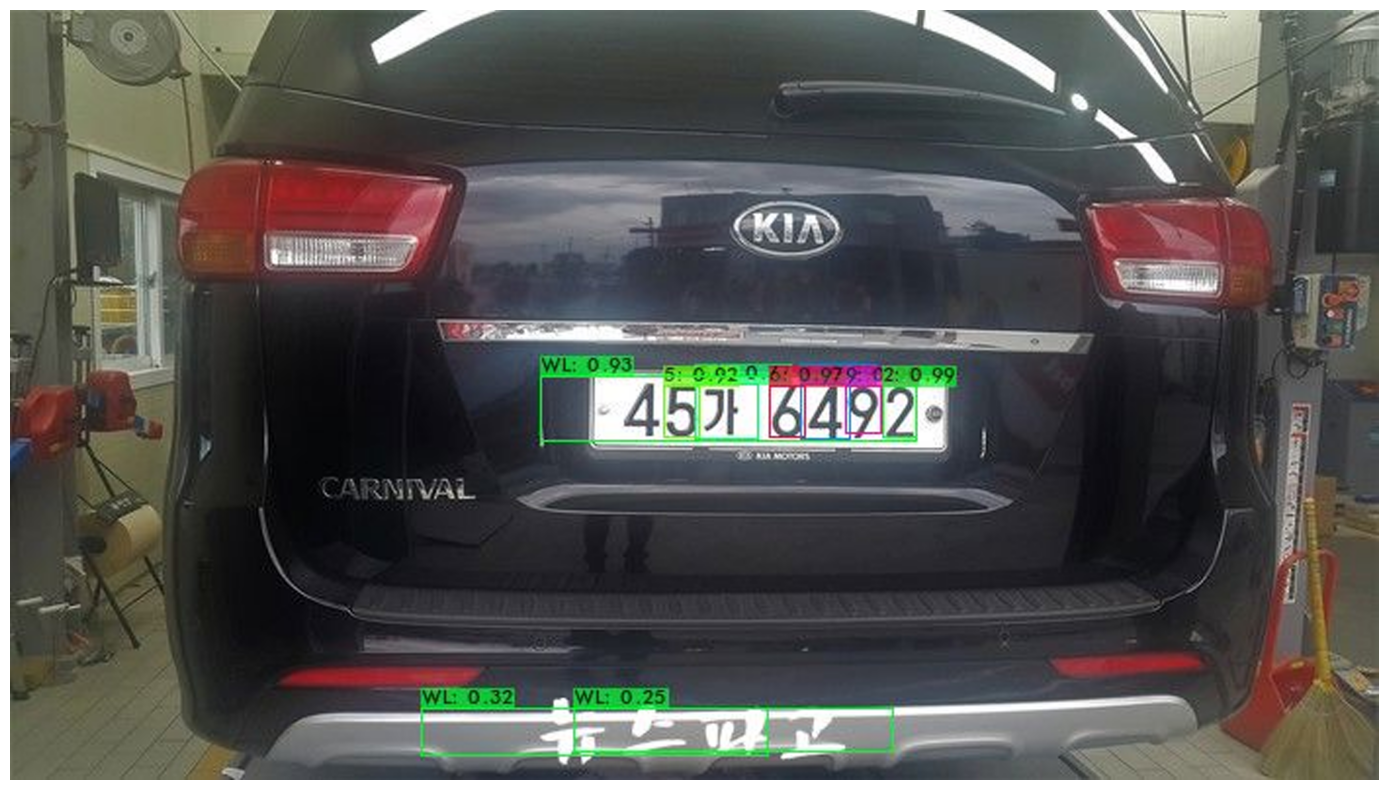

In [ ]:
def detect(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

detect('predictions.jpg')

In [ ]:
#darknet 명령어를 사용해 Precision, Recall, mAP 값을 계산, 결과는 txt파일로 저
!./darknet detector map \
/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data \
/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg \
/content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights \
-points 101 > result.txt



 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 0, GPU: NVIDIA A100-SXM4-40GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     24       3 x 3/ 1    736 x 608 x   3 ->  736 x 608 x  24 0.580 BF
   1 conv     48       3 x 3/ 2    736 x 608 x  24 ->  368 x 304 x  48 2.320 BF
   2 conv     24       1 x 1/ 1    368 x 304 x  48 ->  368 x 304 x  24 0.258 BF
   3 conv     48       3 x 3/ 1    368 x 304 x  24 ->  368 x 304 x  48 2.320 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 368 x 304 x  48 0.005 BF
   5 conv     96       3 x 3/ 2    368 x 304 x  48 ->  184 x 152 x  96 2.320 BF
   6 conv     48       1 x 1/ 1    184 x 152 x  96 ->  184 x 152 x  48 0.258 BF
   7 conv     96       3 x 3/ 1    184 x 152 x  48 ->  184 x 152 x  96 2.320 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 184 x 152 x  96 0.003 BF
   9 conv     48       1 x 1/ 1    184 x 152 x  96 ->  184 x 152 

In [ ]:
import re
import pandas as pd

# 결과 파일을 읽고 분석하는 함수
def parse_results(file_path):
    # 클래스 결과를 저장할 리스트
    results = []

    # result.txt 파일 읽기
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # 각 줄을 파싱
    for line in lines:
        # class_id, name, ap, TP, FP, FN 추출
        match = re.search(r"class_id = (\d+), name = (\w+), ap = ([\d.]+)%.*TP = (\d+), FP = (\d+), FN = (\d+)", line)
        if match:
            name = match.group(2)
            if name == "NONE":  # NONE은 무시
                continue
            ap = float(match.group(3))
            tp = int(match.group(4))
            fp = int(match.group(5))
            fn = int(match.group(6))

            # Precision, Recall 계산
            precision = round(tp / (tp + fp) * 100, 2) if (tp + fp) > 0 else 0.00
            recall = round(tp / (tp + fn) * 100, 2) if (tp + fn) > 0 else 0.00

            # 결과 저장
            results.append({
                "Class Name": name,
                "AP (%)": ap,
                "Precision (%)": precision,
                "Recall (%)": recall
            })

    return results


# 결과를 표로 출력하는 함수
def display_results_table(results, output_csv=False):
    # Pandas DataFrame 생성
    df = pd.DataFrame(results)

    # LP, Number, Character로 그룹화
    df['Category'] = df['Class Name'].apply(
        lambda x: "LP" if x == "WL" else
        "Number" if re.match(r'^\d$', x) else
        "Character"
    )

    # TP, FP, FN 제외된 결과 출력
    df = df[["Class Name", "AP (%)", "Precision (%)", "Recall (%)", "Category"]]
    print(df)

    # CSV 저장 옵션
    if output_csv:
        df.to_csv("detection_results.csv", index=False)
        print("Results saved to detection_results.csv")

    return df


# 실행 부분
file_path = "result.txt"  # result.txt 파일 경로
results = parse_results(file_path)
results_df = display_results_table(results, output_csv=True)





   Class Name  AP (%)  Precision (%)  Recall (%)   Category
0          WL   99.01          99.90       99.50         LP
1           0  100.00          99.31      100.00     Number
2           1   99.99          98.49      100.00     Number
3           2  100.00          99.42      100.00     Number
4           3  100.00          99.12      100.00     Number
5           4  100.00          99.82      100.00     Number
6           5  100.00          98.75      100.00     Number
7           6   99.01          99.54       99.69     Number
8           7   99.99          98.94       99.82     Number
9           8  100.00          99.30      100.00     Number
10          9  100.00          98.82      100.00     Number
11         BA    0.00           0.00        0.00  Character
12         SA    0.00           0.00        0.00  Character
13          A    0.00           0.00        0.00  Character
14         JA    0.00           0.00        0.00  Character
15         HA  100.00          85.00    

In [ ]:
import re
import pandas as pd


# 결과 파일을 읽고 분석하는 함수
def parse_results(file_path):
    # 클래스 결과를 저장할 리스트
    results = []

    # result.txt 파일 읽기
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # 각 줄을 파싱
    for line in lines:
        # class_id, name, ap, TP, FP, FN 추출
        match = re.search(r"class_id = (\d+), name = (\w+), ap = ([\d.]+)%.*TP = (\d+), FP = (\d+), FN = (\d+)", line)
        if match:
            name = match.group(2)
            if name == "NONE":  # NONE은 무시
                continue
            ap = float(match.group(3))
            tp = int(match.group(4))
            fp = int(match.group(5))
            fn = int(match.group(6))

            # Precision, Recall 계산
            precision = round(tp / (tp + fp) * 100, 2) if (tp + fp) > 0 else 0.00
            recall = round(tp / (tp + fn) * 100, 2) if (tp + fn) > 0 else 0.00

            # 결과 저장
            results.append({
                "Class Name": name,
                "AP (%)": ap,
                "Precision (%)": precision,
                "Recall (%)": recall
            })

    return results


# 그룹별 Precision, Recall, mAP 계산 함수
def calculate_group_metrics(df):
    groups = df.groupby('Category')
    summary = []

    for category, group in groups:
        valid_group = group[(group["Precision (%)"] > 0) | (group["Recall (%)"] > 0)]  # Precision, Recall이 0이 아닌 항목만
        mean_precision = valid_group["Precision (%)"].mean()
        mean_recall = valid_group["Recall (%)"].mean()
        mean_ap = valid_group["AP (%)"].mean()

        summary.append({
            "Category": category,
            "Mean Precision (%)": round(mean_precision, 2),
            "Mean Recall (%)": round(mean_recall, 2),
            "mAP (%)": round(mean_ap, 2)
        })

    return pd.DataFrame(summary)


# 결과를 표로 출력하는 함수
def display_results_table_with_summary(results, output_csv=False):
    # Pandas DataFrame 생성
    df = pd.DataFrame(results)

    # LP, Number, Character로 그룹화
    df['Category'] = df['Class Name'].apply(
        lambda x: "LP" if x == "WL" else
        "Number" if re.match(r'^\d$', x) else
        "Character"
    )

    # TP, FP, FN 제외된 결과 출력
    df = df[["Class Name", "AP (%)", "Precision (%)", "Recall (%)", "Category"]]

    # 그룹별 Precision, Recall, mAP 계산
    summary_df = calculate_group_metrics(df)

    print(summary_df)

    # CSV 저장 옵션
    if output_csv:
        summary_df.to_csv("detection_summary.csv", index=False)
        print("Summary saved to detection_summary.csv")

    return summary_df


# 실행 부분
file_path = "result.txt"  # result.txt 파일 경로
results = parse_results(file_path)
summary_df = display_results_table_with_summary(results, output_csv=True)


    Category  Mean Precision (%)  Mean Recall (%)  mAP (%)
0  Character               88.29            99.00    98.50
1         LP               99.90            99.50    99.01
2     Number               99.15            99.95    99.90
Summary saved to detection_summary.csv


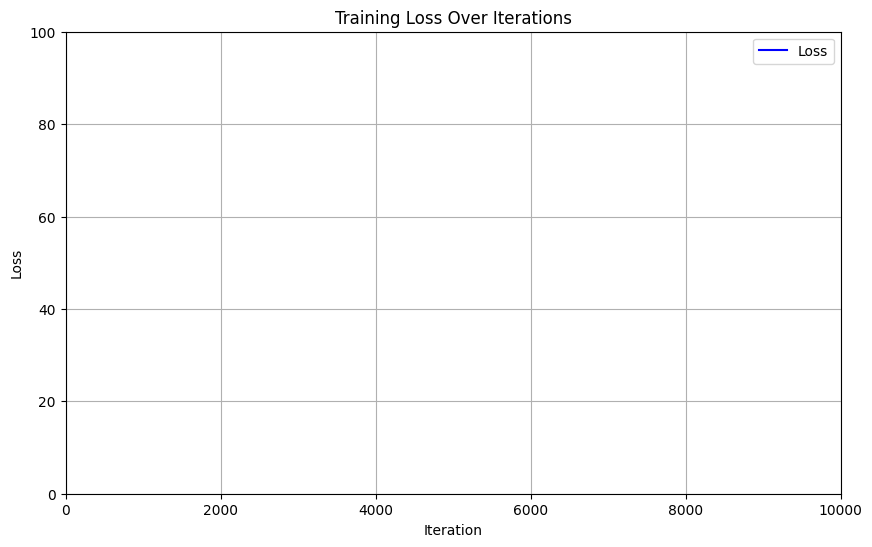

In [ ]:
import re
import matplotlib.pyplot as plt

# 로그 파일에서 Loss 값 추출
def parse_loss(log_file):
    losses = []
    with open(log_file, 'r') as file:
        for line in file:
            # Darknet 로그에서 손실 값이 포함된 패턴을 검색
            match = re.search(r"avg loss = ([\d.]+)", line)
            if match:
                losses.append(float(match.group(1)))
    return losses

# Loss 그래프 그리기
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(losses)), losses, label="Loss", color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Iterations")
    plt.xlim(0, 10000)  # x축 범위 설정
    plt.ylim(0, 100)    # y축 범위 설정
    plt.grid(True)
    plt.legend()
    plt.show()

# 실행
log_file = "train_log.txt"  # 로그 파일 경로
losses = parse_loss(log_file)
plot_loss(losses)



In [ ]:
import os

# 파일이 저장된 디렉토리 경로 설정
directory = "/content/drive/My Drive/bboxes_yolo"  # 여기에 실제 폴더 경로 입력

# 파일 이름 변경
for filename in os.listdir(directory):
    if filename.startswith("Whitelong6k_") and filename.endswith(".txt"):
        # 기존 이름에서 숫자 추출
        base_name, ext = os.path.splitext(filename)
        number = base_name.split("_")[-1]  # 마지막 숫자 추출
        # 새로운 이름 생성
        new_filename = f"Whitelong6k_a_{number}{ext}"
        # 파일 경로 수정
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, new_filename)
        # 이름 변경 실행
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_filename}")


Renamed: Whitelong6k_1683.txt -> Whitelong6k_a_1683.txt
Renamed: Whitelong6k_1682.txt -> Whitelong6k_a_1682.txt
Renamed: Whitelong6k_1686.txt -> Whitelong6k_a_1686.txt
Renamed: Whitelong6k_1684.txt -> Whitelong6k_a_1684.txt
Renamed: Whitelong6k_1685.txt -> Whitelong6k_a_1685.txt
Renamed: Whitelong6k_1687.txt -> Whitelong6k_a_1687.txt
Renamed: Whitelong6k_1689.txt -> Whitelong6k_a_1689.txt
Renamed: Whitelong6k_1680.txt -> Whitelong6k_a_1680.txt
Renamed: Whitelong6k_1690.txt -> Whitelong6k_a_1690.txt
Renamed: Whitelong6k_1681.txt -> Whitelong6k_a_1681.txt
Renamed: Whitelong6k_1691.txt -> Whitelong6k_a_1691.txt
Renamed: Whitelong6k_1688.txt -> Whitelong6k_a_1688.txt
Renamed: Whitelong6k_1694.txt -> Whitelong6k_a_1694.txt
Renamed: Whitelong6k_1703.txt -> Whitelong6k_a_1703.txt
Renamed: Whitelong6k_1705.txt -> Whitelong6k_a_1705.txt
Renamed: Whitelong6k_1697.txt -> Whitelong6k_a_1697.txt
Renamed: Whitelong6k_1692.txt -> Whitelong6k_a_1692.txt
Renamed: Whitelong6k_1698.txt -> Whitelong6k_a_1

In [ ]:
# Google Drive의 기본 디렉토리 설정
drive_directory = "/content/drive/MyDrive/object_detection/darknet/data/Whitelong6k"

# 번호 범위 설정
start_num = 1680
end_num = 2159

# 파일 합치기
for num in range(start_num, end_num + 1):
    # 원본 파일과 추가 파일 이름 정의
    original_filename = f"Whitelong6k_{num}.txt"
    additional_filename = f"Whitelong6k_a_{num}.txt"

    # 파일 경로 생성
    original_file_path = os.path.join(drive_directory, original_filename)
    additional_file_path = os.path.join("/content/drive/My Drive/bboxes_yolo", additional_filename)

    # 결과 파일 이름 정의
    merged_filename = f"Whitelong6k_{num}.txt"
    merged_file_path = os.path.join("/content/drive/My Drive/Plus", merged_filename)


    # 파일 병합
    try:
        # 원본 파일 읽기
        with open(original_file_path, 'r') as original_file:
            original_content = original_file.read().strip()  # 불필요한 공백 제거

        # 추가 파일 읽기
        with open(additional_file_path, 'r') as additional_file:
            additional_content = additional_file.read().strip()  # 불필요한 공백 제거

        # 두 내용을 공백 없이 합쳐 새로운 파일 생성
        with open(merged_file_path, 'w') as merged_file:
            merged_file.write(original_content + "\n" + additional_content)

        print(f"Merged: {original_filename} + {additional_filename} -> {merged_filename}")

    except FileNotFoundError as e:
        print(f"Error: {e}")


Merged: Whitelong6k_1680.txt + Whitelong6k_a_1680.txt -> Whitelong6k_1680.txt
Merged: Whitelong6k_1681.txt + Whitelong6k_a_1681.txt -> Whitelong6k_1681.txt
Merged: Whitelong6k_1682.txt + Whitelong6k_a_1682.txt -> Whitelong6k_1682.txt
Merged: Whitelong6k_1683.txt + Whitelong6k_a_1683.txt -> Whitelong6k_1683.txt
Merged: Whitelong6k_1684.txt + Whitelong6k_a_1684.txt -> Whitelong6k_1684.txt
Merged: Whitelong6k_1685.txt + Whitelong6k_a_1685.txt -> Whitelong6k_1685.txt
Merged: Whitelong6k_1686.txt + Whitelong6k_a_1686.txt -> Whitelong6k_1686.txt
Merged: Whitelong6k_1687.txt + Whitelong6k_a_1687.txt -> Whitelong6k_1687.txt
Merged: Whitelong6k_1688.txt + Whitelong6k_a_1688.txt -> Whitelong6k_1688.txt
Merged: Whitelong6k_1689.txt + Whitelong6k_a_1689.txt -> Whitelong6k_1689.txt
Merged: Whitelong6k_1690.txt + Whitelong6k_a_1690.txt -> Whitelong6k_1690.txt
Merged: Whitelong6k_1691.txt + Whitelong6k_a_1691.txt -> Whitelong6k_1691.txt
Merged: Whitelong6k_1692.txt + Whitelong6k_a_1692.txt -> Whitelo

In [ ]:
!./darknet detector demo \
/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data \
/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg \
/content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights \
/content/drive/MyDrive/object_detection/darknet/data/test_vid/test_vid1.mp4 \
-dont_show -out_filename result_video.mp4


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

 cvWriteFrame 
Objects:


FPS:126.8 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:

7: 47% 

FPS:127.0 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:127.2 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:127.4 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:127.6 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:127.8 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:127.9 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.2 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.4 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.5 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.7 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.6 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.7 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.8 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:129.0 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:

7: 26% 

FPS:129.0 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:128.9 	 AVG_FPS:123.2

 cvWriteFrame 
Objects:


FPS:129.0 	 AVG_FPS:

In [ ]:
import cv2
import darknet
import time

# 경로 설정
config_path = "/content/drive/MyDrive/object_detection/darknet/cfg/yolov3_LP_mode2.cfg"
weight_path = "/content/drive/MyDrive/object_detection/darknet/backup/yolov3_LP_mode2_last.weights"
data_path = "/content/drive/MyDrive/object_detection/darknet/data/yolov3_LP_mode2.data"
video_path = "/content/drive/MyDrive/object_detection/darknet/data/test_vid/test_vid1.mp4"
output_path = "result_video.avi"

# Darknet 초기화
network, class_names, class_colors = darknet.load_network(
    config_path,
    data_path,
    weight_path,
    batch_size=1
)

# 영상 열기
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*"XVID"), fps, (width, height))

# 프레임 단위로 객체 감지
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Darknet 형식으로 변환
    darknet_image = darknet.make_image(width, height, 3)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    darknet.copy_image_from_bytes(darknet_image, frame_rgb.tobytes())

    # 감지 수행
    detections = darknet.detect_image(network, class_names, darknet_image)
    frame = darknet.draw_boxes(detections, frame_rgb, class_colors)

    # 결과 영상 저장
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    cv2.imshow('Inference', cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    if cv2.waitKey(1) == 27:  # ESC 키로 중단
        break

cap.release()
out.release()
cv2.destroyAllWindows()


OSError: /content/drive/MyDrive/object_detection/darknet/libdarknet.so: cannot open shared object file: No such file or directory